In this file we will do the following things -

- Parsed messy industrial CSV

- Identified DESCRIPTION as core semantic field

- Dropped missing descriptions (998 → 663 rows)

- Enriched text with Application / Characteristic / Material / Size

- Normalized text (lowercase, removed symbols, normalized spaces)

- Verified text length distribution

- Saved final dataset as:

👉 clean_parts.csv

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [23]:
df = pd.read_csv(r"C:\Users\TINA\Downloads\Parts.csv", engine="python", on_bad_lines="skip")
df.head()

,,,,,,ID;DESCRIPTION;Attribut1;Additional Feature;Application;Characteristic;Temp;Height;Length in mm;Rating;Material;Size;Code;Joule-integral-Nom (J);LC Risk;Maximum AC Voltage Rating;Maximum DC Voltage Rating;Maximum Power Dissipation;Mounting;Mounting Feature;Number of Terminals;Operating Temperature-Max (Cel);Operating Temperature-Min (Cel);Physical Dimension;Pre-arcing time-Min (ms);Product Diameter;Product Length;Rated Breaking Capacity (A);Rated Current (A);Rated Voltage (V);Rated Voltage(AC) (V);Rated Voltage(DC) (V)
A1;Indicator Red Fast Movement 1.6A 250V Holder Plastic 5 X 20mm Ceramic Box CCC/PSE/VDE/cULus Electric Indicator,Very Fast Blow,1.6A,250VAC,1500A (IR),Inline/holder,5x20mm;Fast;;Primary Protection In Equipment;...
A2;Non Resettable Indicators Electric Indicator,Very Fast Blow,6.3A,250VAC,1500A (IR),Inline/holder,5x20mm;;;Primary Protection In Equipment;VERY...
A3;Indicator Red Fast Movement 8A 250V Holder Plastic 5 X 20mm Ceramic Box KC/PSE/VDE/cULus Electric Indicator,Very Fast Blow,8A,250VAC,1500A (IR),Inline/holder,5x20mm;Fast;;Primary Protection In Equipment;...
A4;Non Resettable Indicators Electric Indicator,Very Fast Blow,10A,250VAC,1500A (IR),Inline/holder,5x20mm;;;Primary Protection In Equipment;VERY...
A5;Indicator Red Fast Movement 12.5A 250V Holder Plastic 5 X 20mm Ceramic Box PSE/cULus Electric Indicator,Very Fast Blow,12.5A,250VAC,500A (IR),Inline/holder,5x20mm;Fast;;Primary Protection In Equipment;...


In [24]:
import pandas as pd

df = pd.read_csv(
    r"C:\Users\TINA\Downloads\Parts.csv",
    sep=";",
    engine="python",
    skip_blank_lines=True
)

df.head()


,ID,DESCRIPTION,Attribut1,Additional Feature,Application,Characteristic,Temp,Height,Length in mm,Rating,...,Operating Temperature-Min (Cel),Physical Dimension,Pre-arcing time-Min (ms),Product Diameter,Product Length,Rated Breaking Capacity (A),Rated Current (A),Rated Voltage (V),Rated Voltage(AC) (V),Rated Voltage(DC) (V)
0,A1,Indicator Red Fast Movement 1.6A 250V Holder P...,Fast,NaN,Primary Protection In Equipment,VERY FAST,NaN,20mm,5.2mm,1.6A,...,-55Cel,5.2mm x 20mm,3ms,5.2mm,20mm,1500A,1.6A,250V,250V,NaN
1,A2,"Non Resettable Indicators Electric Indicator, ...",NaN,NaN,Primary Protection In Equipment,VERY FAST,NaN,20mm,5.2mm,NaN,...,-55Cel,5.2mm x 20mm,3ms,5.2mm,20mm,1500A,6.3A,250V,250V,NaN
2,A3,Indicator Red Fast Movement 8A 250V Holder Pla...,Fast,NaN,Primary Protection In Equipment,VERY FAST,NaN,20mm,5.2mm,8A,...,-55Cel,5.2mm x 20mm,10ms,5.2mm,20mm,1500A,8A,250V,250V,NaN
3,A4,"Non Resettable Indicators Electric Indicator, ...",NaN,NaN,Primary Protection In Equipment,VERY FAST,NaN,20mm,5.2mm,NaN,...,-55Cel,5.2mm x 20mm,10ms,5.2mm,20mm,1500A,10A,250V,250V,NaN
4,A5,Indicator Red Fast Movement 12.5A 250V Holder ...,Fast,NaN,Primary Protection In Equipment,VERY FAST,NaN,20mm,5.2mm,12.5A,...,-55Cel,5.2mm x 20mm,10ms,5.2mm,20mm,500A,12.5A,250V,250V,NaN


In [25]:
print("Shape:", df.shape)
df.info()

Shape: (998, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998 entries, 0 to 997
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               998 non-null    object 
 1   DESCRIPTION                      663 non-null    object 
 2   Attribut1                        770 non-null    object 
 3   Additional Feature               324 non-null    object 
 4   Application                      821 non-null    object 
 5   Characteristic                   672 non-null    object 
 6   Temp                             417 non-null    object 
 7   Height                           705 non-null    object 
 8   Length in mm                     705 non-null    object 
 9   Rating                           834 non-null    object 
 10  Material                         771 non-null    object 
 11  Size                             880 non-null    object 
 12  Code 

In [26]:
df.columns

Index(['ID', 'DESCRIPTION', 'Attribut1', 'Additional Feature', 'Application',
       'Characteristic', 'Temp', 'Height', 'Length in mm', 'Rating',
       'Material', 'Size', 'Code', 'Joule-integral-Nom (J)', 'LC Risk',
       'Maximum AC Voltage Rating', 'Maximum DC Voltage Rating',
       'Maximum Power Dissipation', 'Mounting', 'Mounting Feature',
       'Number of Terminals', 'Operating Temperature-Max (Cel)',
       'Operating Temperature-Min (Cel)', 'Physical Dimension',
       'Pre-arcing time-Min (ms)', 'Product Diameter', 'Product Length',
       'Rated Breaking Capacity (A)', 'Rated Current (A)', 'Rated Voltage (V)',
       'Rated Voltage(AC) (V)', 'Rated Voltage(DC) (V)'],
      dtype='object')

In [27]:
df.isna().sum().sort_values(ascending=False)

Pre-arcing time-Min (ms)           890
Maximum Power Dissipation          745
Product Diameter                   726
Additional Feature                 674
Temp                               581
Rated Voltage (V)                  559
Maximum DC Voltage Rating          550
Rated Voltage(DC) (V)              541
Code                               443
Rated Voltage(AC) (V)              434
Rated Breaking Capacity (A)        343
Joule-integral-Nom (J)             335
DESCRIPTION                        335
Physical Dimension                 330
Characteristic                     326
Rated Current (A)                  325
Mounting Feature                   319
Operating Temperature-Min (Cel)    296
Length in mm                       293
Height                             293
Operating Temperature-Max (Cel)    291
Maximum AC Voltage Rating          264
Number of Terminals                240
Product Length                     238
Attribut1                          228
Material                 

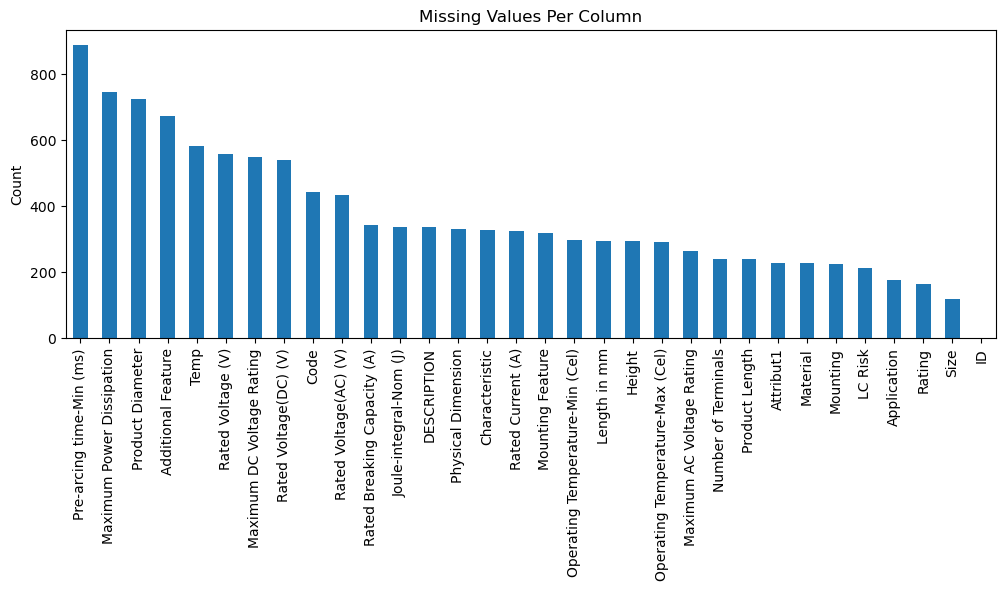

In [28]:
import matplotlib.pyplot as plt

missing = df.isna().sum().sort_values(ascending=False)

missing.plot(kind="bar", figsize=(12,4))
plt.title("Missing Values Per Column")
plt.ylabel("Count")
plt.show()

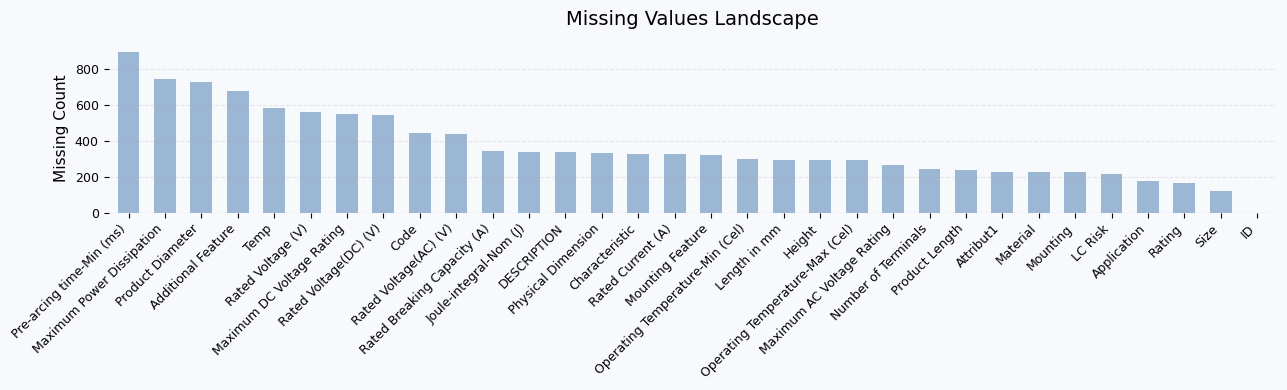

In [29]:
import matplotlib.pyplot as plt
import numpy as np

missing = df.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(13, 4))
ax = missing.plot(
    kind="bar",
    color="#9BB7D4",        # muted sky blue
    width=0.6
)

plt.title("Missing Values Landscape",
          fontsize=14, fontweight="medium", pad=14)
plt.ylabel("Missing Count", fontsize=11)

plt.xticks(rotation=45, ha="right", fontsize=9)
plt.yticks(fontsize=9)

# Floating effect: remove spines
for spine in ax.spines.values():
    spine.set_visible(False)

# Soft baseline
plt.axhline(0, color="#B0B8C1", linewidth=0.8)

# Gentle grid
plt.grid(axis="y", linestyle="--", alpha=0.25)

# Soft background
ax.set_facecolor("#F7F9FC")
plt.gcf().patch.set_facecolor("#F7F9FC")

plt.tight_layout()
plt.show()

In [30]:
df_clean = df.dropna(subset=["DESCRIPTION"]).copy()

print("Before:", df.shape)
print("After:", df_clean.shape)

Before: (998, 32)
After: (663, 32)


In [31]:
# Create combined_text

In [32]:
# Select useful columns
text_cols = ["DESCRIPTION", "Application", "Characteristic", "Material", "Size"]

# Fill NaNs with empty strings for these columns
for col in text_cols:
    df_clean[col] = df_clean[col].fillna("")

# Create combined text field
df_clean["combined_text"] = (
    df_clean["DESCRIPTION"] + " " +
    df_clean["Application"] + " " +
    df_clean["Characteristic"] + " " +
    df_clean["Material"] + " " +
    df_clean["Size"]
)

df_clean[["ID", "combined_text"]].head()

,ID,combined_text
0,A1,Indicator Red Fast Movement 1.6A 250V Holder P...
1,A2,"Non Resettable Indicators Electric Indicator, ..."
2,A3,Indicator Red Fast Movement 8A 250V Holder Pla...
3,A4,"Non Resettable Indicators Electric Indicator, ..."
4,A5,Indicator Red Fast Movement 12.5A 250V Holder ...


In [33]:
# Text Normalization

In [34]:
# Lowercase
df_clean["combined_text"] = df_clean["combined_text"].str.lower()

# Remove special characters (keep letters and numbers)
df_clean["combined_text"] = df_clean["combined_text"].str.replace(r"[^a-z0-9 ]", " ", regex=True)

# Remove extra spaces
df_clean["combined_text"] = df_clean["combined_text"].str.replace(r"\s+", " ", regex=True)

df_clean[["ID", "combined_text"]].head()

,ID,combined_text
0,A1,indicator red fast movement 1 6a 250v holder p...
1,A2,non resettable indicators electric indicator v...
2,A3,indicator red fast movement 8a 250v holder pla...
3,A4,non resettable indicators electric indicator v...
4,A5,indicator red fast movement 12 5a 250v holder ...


In [35]:
# Text Length Histogram

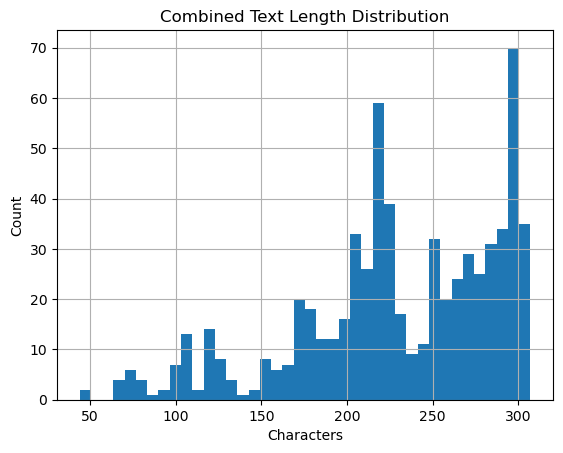

count    663.000000
mean     229.441931
std       59.386688
min       44.000000
25%      199.000000
50%      230.000000
75%      282.000000
max      307.000000
Name: text_length, dtype: float64

In [36]:
df_clean["text_length"] = df_clean["combined_text"].apply(len)

df_clean["text_length"].hist(bins=40)
plt.title("Combined Text Length Distribution")
plt.xlabel("Characters")
plt.ylabel("Count")
plt.show()

df_clean["text_length"].describe()

In [37]:
# Save clean_parts.csv

In [38]:
# Drop helper column
df_clean = df_clean.drop(columns=["text_length"])

# Save cleaned dataset
df_clean.to_csv("clean_parts.csv", index=False)

print("✅ clean_parts.csv saved successfully")

✅ clean_parts.csv saved successfully


In [39]:
pd.read_csv("clean_parts.csv").shape

(663, 33)